# 1. Problem statement
This data set contains details of the features that are used to predict the "Quality of Wine".


# 2. Data collection
The datset was collected from kaggle.
Link for dataset https://www.kaggle.com/datasets/rajyellow46/wine-quality

# 3. Data Ingestion

importing the necessary libraries

In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [19]:
wine= pd.read_csv('winequality-red.csv')

In [20]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 4. Data Cleaning

In [21]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no null value in this dataset.

In [22]:
wine.duplicated().sum()

240

In [23]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All the features are of float type.

# 5. EDA

In [24]:
wine.sample(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
924,8.6,0.47,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.2,5
386,7.8,0.54,0.26,2.0,0.088,23.0,48.0,0.99810,3.41,0.74,9.2,6
1279,9.8,0.30,0.39,1.7,0.062,3.0,9.0,0.99480,3.14,0.57,11.5,7
1355,6.1,0.32,0.25,1.8,0.086,5.0,32.0,0.99464,3.36,0.44,10.1,5
295,10.8,0.50,0.46,2.5,0.073,5.0,27.0,1.00010,3.05,0.64,9.5,5
765,9.2,0.67,0.10,3.0,0.091,12.0,48.0,0.99888,3.31,0.54,9.5,6


In [25]:
wine.shape

(1599, 12)

In [27]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [30]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

𝐒𝐭𝐚𝐭𝐢𝐬𝐭𝐢𝐜𝐚𝐥 𝐃𝐞𝐬𝐜𝐫𝐢𝐩𝐭𝐢𝐨𝐧

In [37]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Creating a discrete, categorical response feature ('rating') from existing 'quality' variable.

In [69]:
conditions=[(wine['quality'] >=7),(wine['quality']<=4)]
rating=['good','bad']
wine['rating']=np.select(conditions,rating,default='average')

In [71]:
wine['rating'].value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [77]:
wine.groupby('rating').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
bad,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
good,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


𝐔𝐧𝐢𝐯𝐚𝐫𝐢𝐚𝐭𝐞 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬

In [72]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'rating'],
      dtype='object')

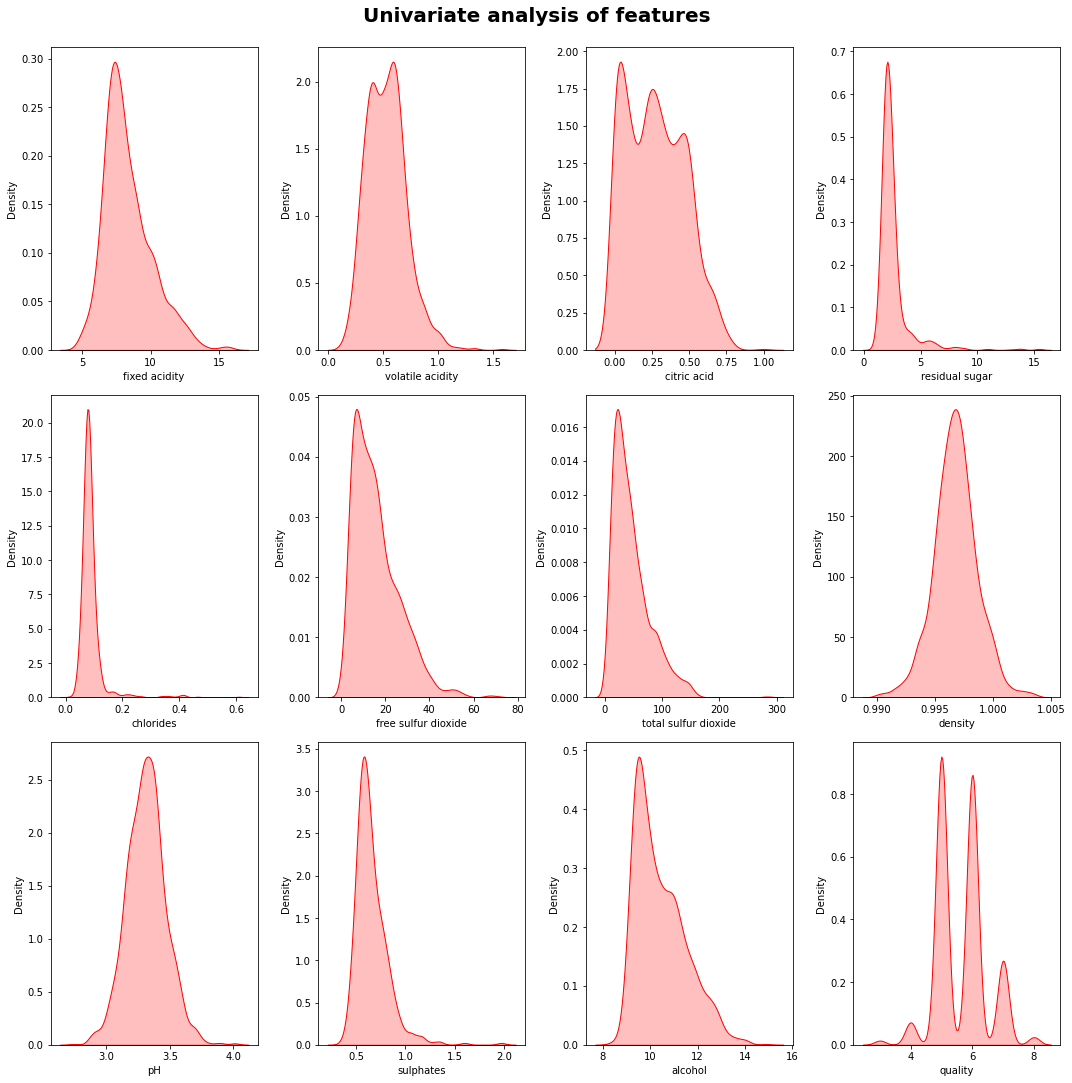

In [76]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate analysis of features",fontsize=20,fontweight='bold',y=1)

for i in range(0,len(wine.columns)-1):
    plt.subplot(3,4,i+1)
    sns.kdeplot(x=wine[wine.columns[i]],shade=True,color='red')
    plt.xlabel(wine.columns[i])
    plt.tight_layout()

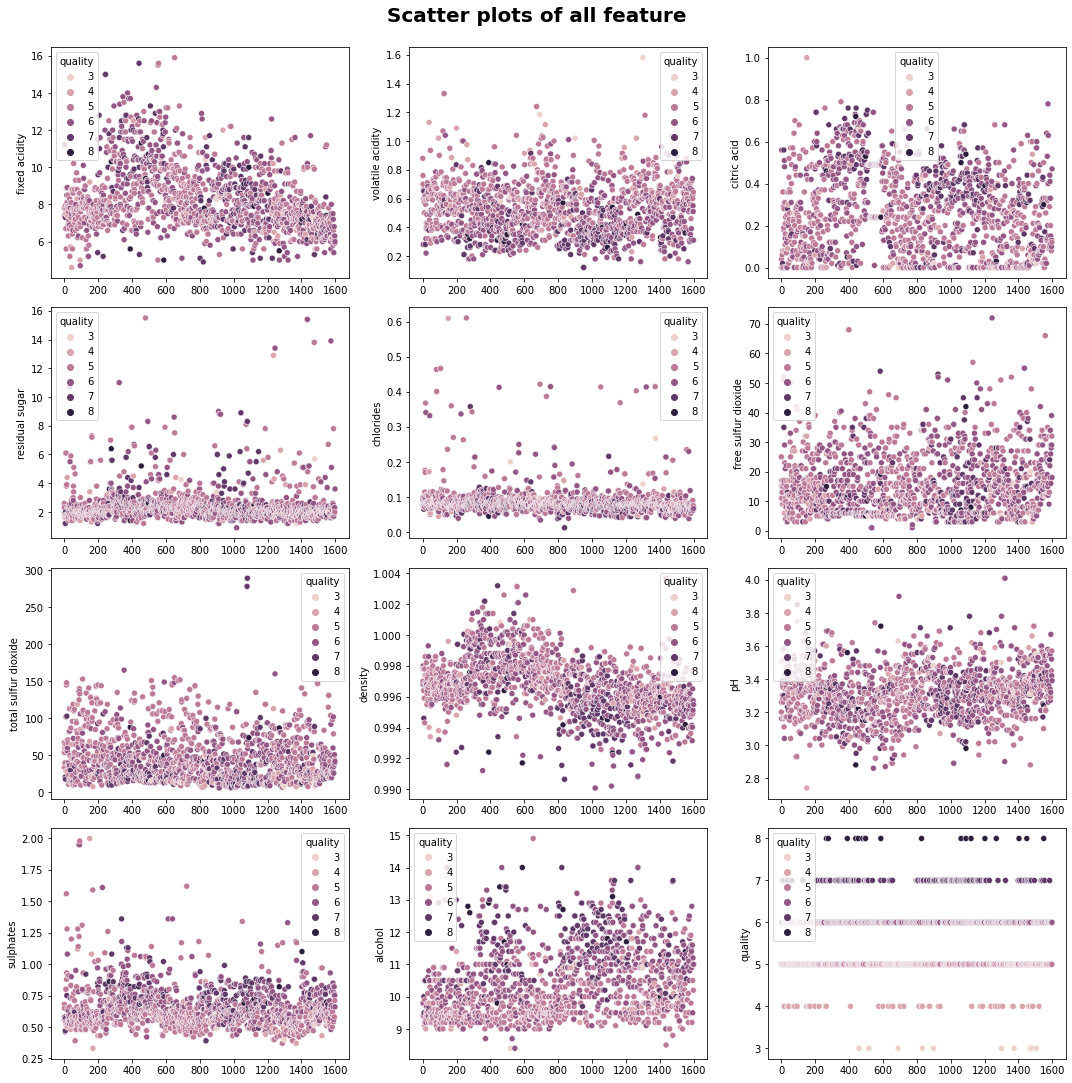

In [86]:
plt.figure(figsize=(15,15))
plt.suptitle("Scatter plots of all feature",fontsize=20,fontweight='bold',y=1)

for i in range(0,len(wine.columns)-1):
    plt.subplot(4,3,i+1)
    sns.scatterplot(y=wine.columns[i],x=wine.index,data=wine,hue='quality')
    plt.tight_layout()

𝐁𝐢𝐯𝐚𝐫𝐢𝐚𝐭𝐞 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬

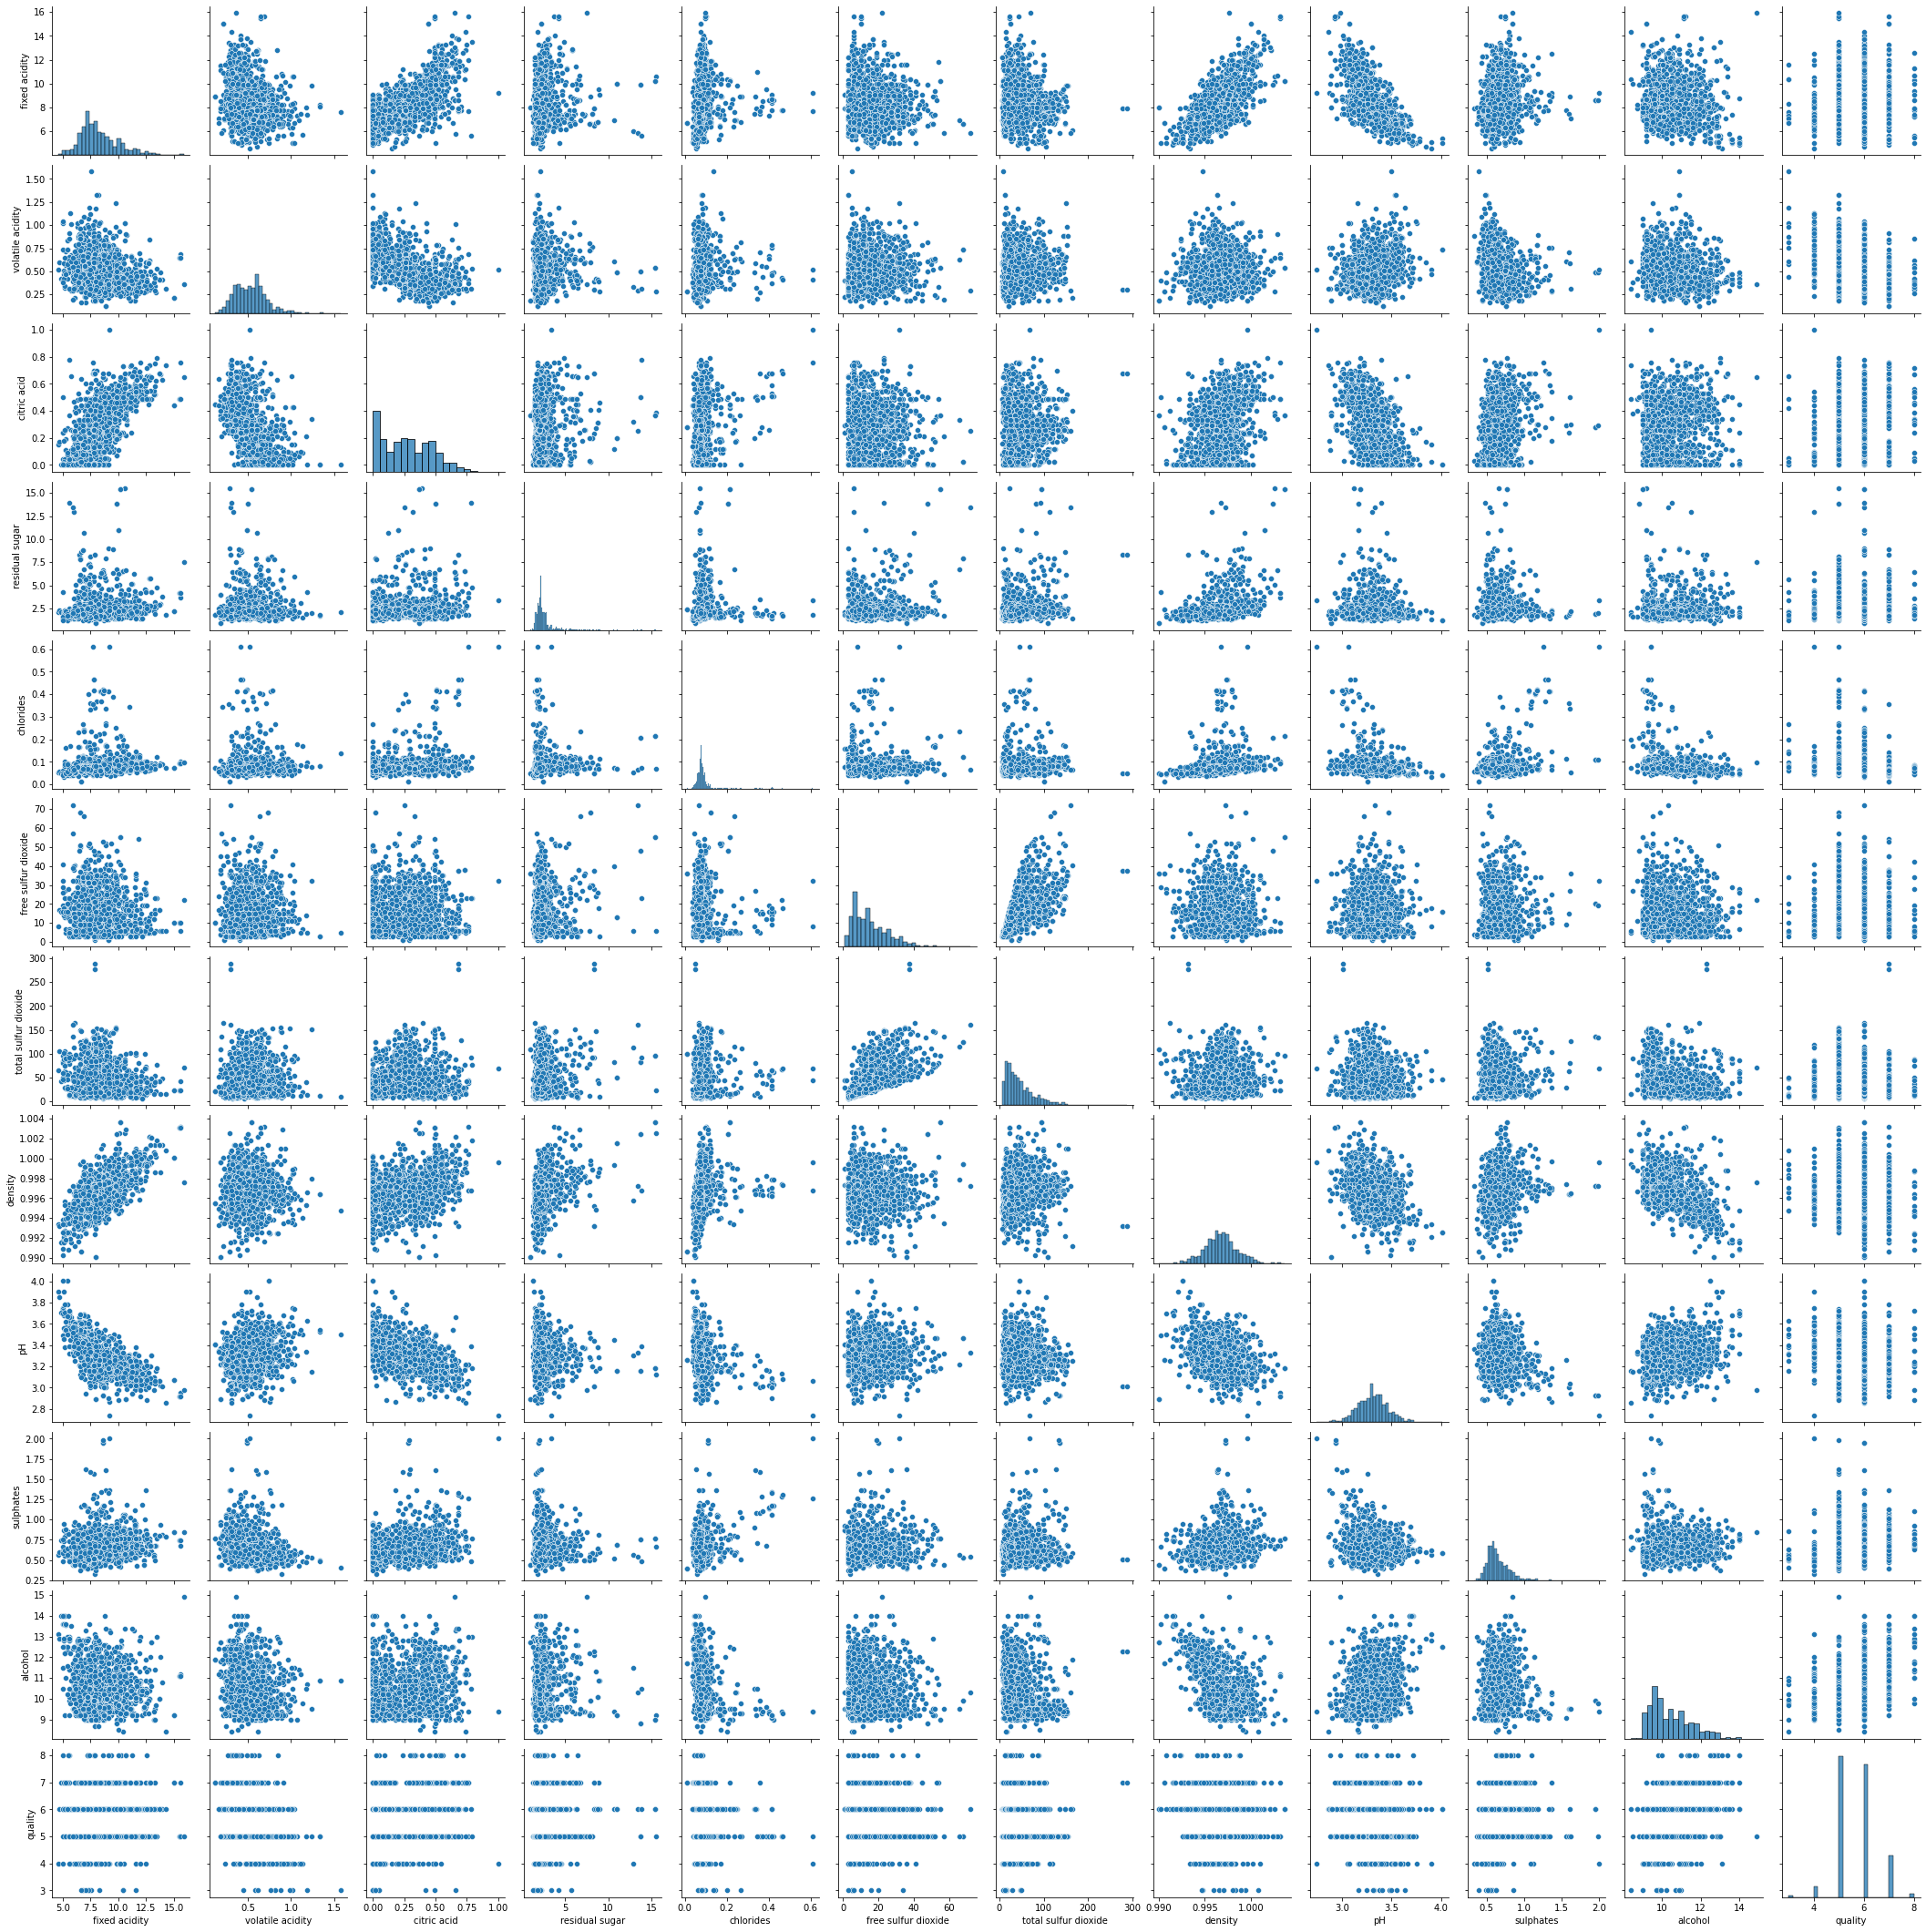

In [79]:
sns.pairplot(wine)
plt.show()

𝐁𝐢𝐯𝐚𝐫𝐢𝐚𝐭𝐞 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬 𝐰.𝐫.𝐭. 𝐓𝐚𝐫𝐠𝐞𝐭 𝐕𝐚𝐫𝐢𝐚𝐛𝐥𝐞

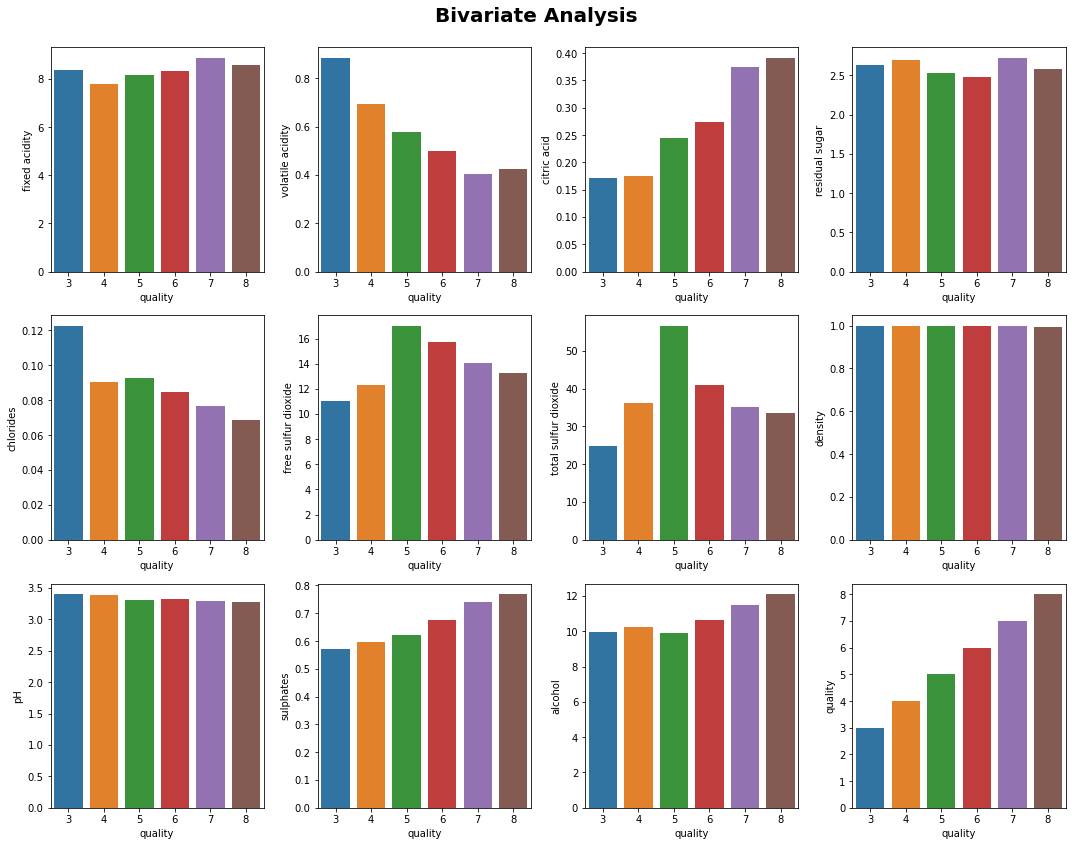

In [88]:
plt.figure(figsize=(15,15))
plt.suptitle("Bivariate Analysis",fontsize=20,fontweight='bold',y=1)

for i in range(0,len(wine.columns)-1):
    plt.subplot(4,4,i+1)
    sns.barplot(y=wine.columns[i],x='quality',data=wine,ci=0)
    plt.tight_layout()

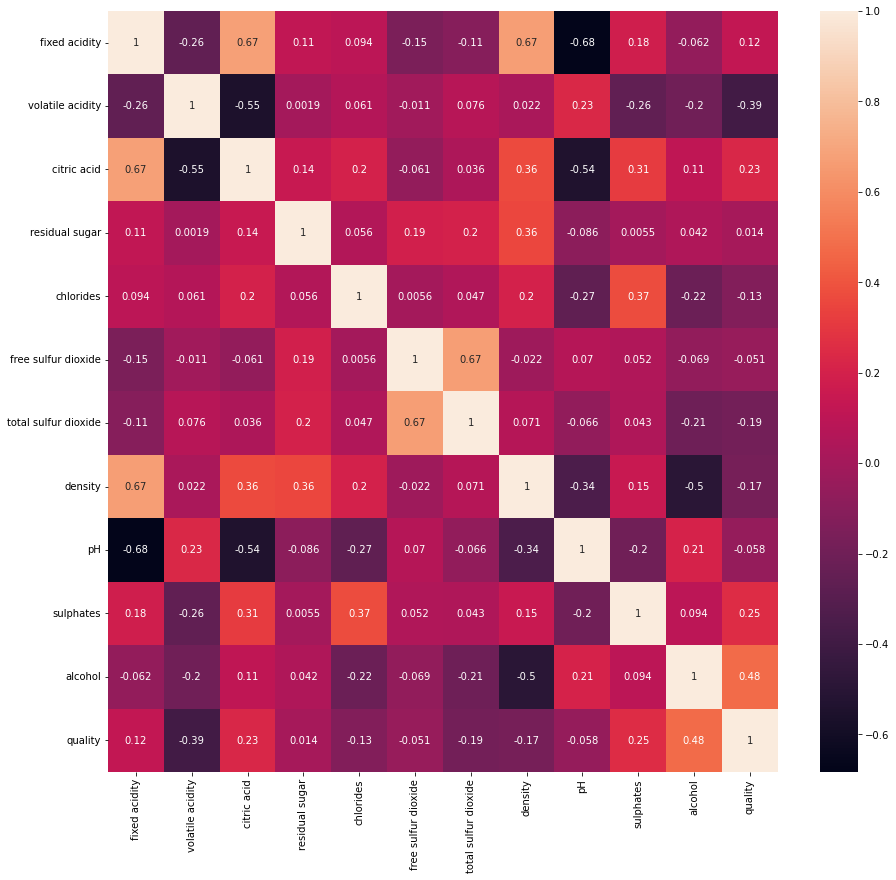

In [89]:
plt.figure(figsize=(15,14))
sns.heatmap(wine.corr(),annot=True)
plt.show()

In [93]:
a=wine.corr()
a['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

-> We can observe that, the 'alcohol, sulphates, citric acid & fixed acidity' have maximum corelation with response variable 'quality'.

-> This means that, they need to be further analysed for detailed pattern and corelation exploration. Hence, we will use only these 4 variables in our future analysis.

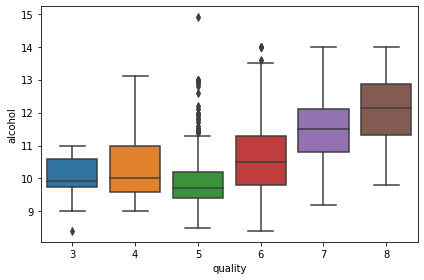

In [102]:
sns.boxplot(x="quality",y='alcohol',data=wine)
plt.tight_layout()
plt.show()

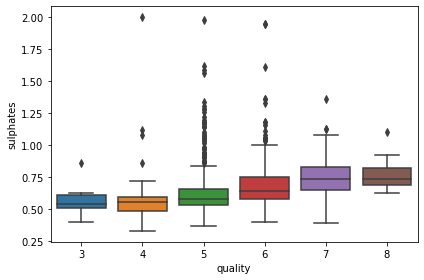

In [99]:
sns.boxplot(x="quality",y='sulphates',data=wine)
plt.tight_layout()
plt.show()

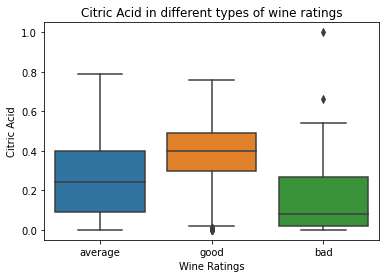

In [103]:
bx=sns.boxplot(x="rating",y="citric acid",data=wine)
bx.set(xlabel="Wine Ratings",ylabel="Citric Acid",title='Citric Acid in different types of wine ratings')
plt.show()

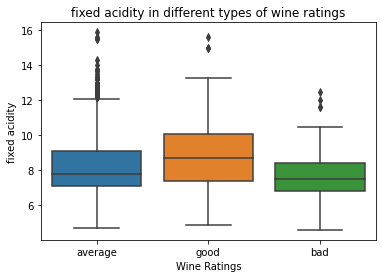

In [104]:
bx=sns.boxplot(x="rating",y="fixed acidity",data=wine)
bx.set(xlabel="Wine Ratings",ylabel="fixed acidity",title='fixed acidity in different types of wine ratings')
plt.show()

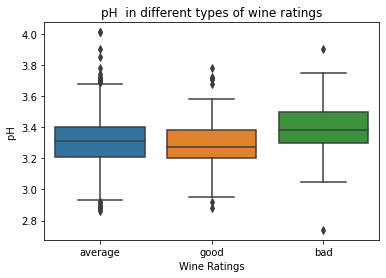

In [105]:
bx=sns.boxplot(x="rating",y="pH",data=wine)
bx.set(xlabel="Wine Ratings",ylabel="pH ",title='pH  in different types of wine ratings')
plt.show()

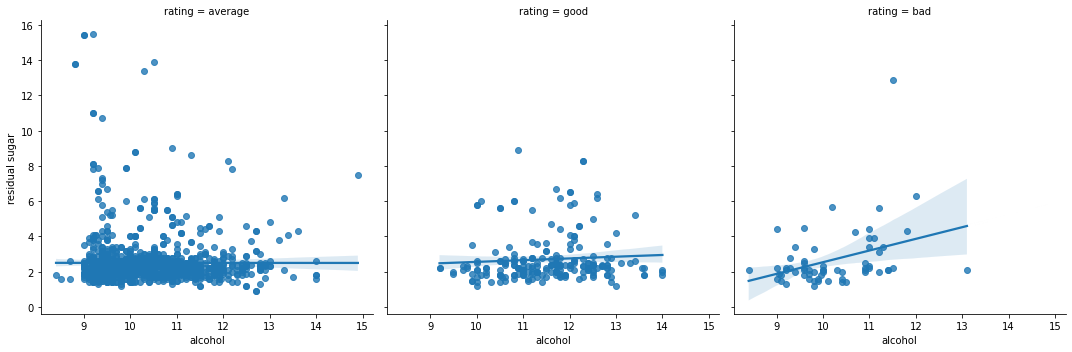

In [106]:
sns.lmplot(x="alcohol",y="residual sugar",col="rating",data=wine)
plt.show()

The linear regression plots above for different wine quality ratings (bad, average & good) shows the regression between alcohol and residual sugar content of the red wine.

We can observe from the trendline that, for good and average wine types the residual sugar content remains almost constant irrespective of alcohol content value. Whereas for bad quality wine, the residual sugar content increases gradually with the increase in alcohol content.

This analysis can help in manufacturing the good quality wine with continuous monitoring and contrilling the alcohol and residual sugar content of the red wine

# 6. Data Preprocessing

In [107]:
#Changing categorical data into the numerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
wine["rating"]=le.fit_transform(wine["rating"])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [108]:
wine['rating'].unique() #0-> average,1->good,2->bad

array([0, 2, 1])

## Split Data Into Train and Test

In [109]:
X=wine.iloc[:,:-2]
Y=wine['rating']

In [110]:
X.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [111]:
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    2
8    2
9    0
Name: rating, dtype: int32

In [112]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
print(X)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


## Train Test Split

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)

In [114]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


### Model Building
1. Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print("Logistic Regression Results:-")
lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)
print()
#Confusionmatrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(Y_test,y_pred)
print("Confusion Matrix")
print(cm)
print()
#accuracy
ac= accuracy_score(Y_test,y_pred)
print("Accuracy:- ",ac)
print()
#classification report
cr=classification_report(Y_test,y_pred)
print("classification report ")
print(cr)

Logistic Regression Results:-

Confusion Matrix
[[250   0   7]
 [  9   0   0]
 [ 30   0  24]]

Accuracy:-  0.85625

classification report 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       257
           1       0.00      0.00      0.00         9
           2       0.77      0.44      0.56        54

    accuracy                           0.86       320
   macro avg       0.55      0.47      0.49       320
weighted avg       0.83      0.86      0.83       320



2. Decision Tree Classifier

In [129]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
print("Decision Tree Classifier result:- ")
dtree.fit(X_train,Y_train)
y_pred=dtree.predict(X_test)

#confusion matrix
cm=confusion_matrix(Y_test,y_pred)
print("Confusion Matrix:- ")
print(cm)

ac=accuracy_score(Y_test,y_pred)*100
print("Accuracy:- ",ac)

cr=classification_report(Y_test,y_pred)
print("classification report ")
print(cr)

Decision Tree Classifier result:- 
Confusion Matrix:- 
[[222  11  24]
 [  6   1   2]
 [ 20   0  34]]
Accuracy:-  80.3125
classification report 
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       257
           1       0.08      0.11      0.10         9
           2       0.57      0.63      0.60        54

    accuracy                           0.80       320
   macro avg       0.52      0.53      0.52       320
weighted avg       0.82      0.80      0.81       320



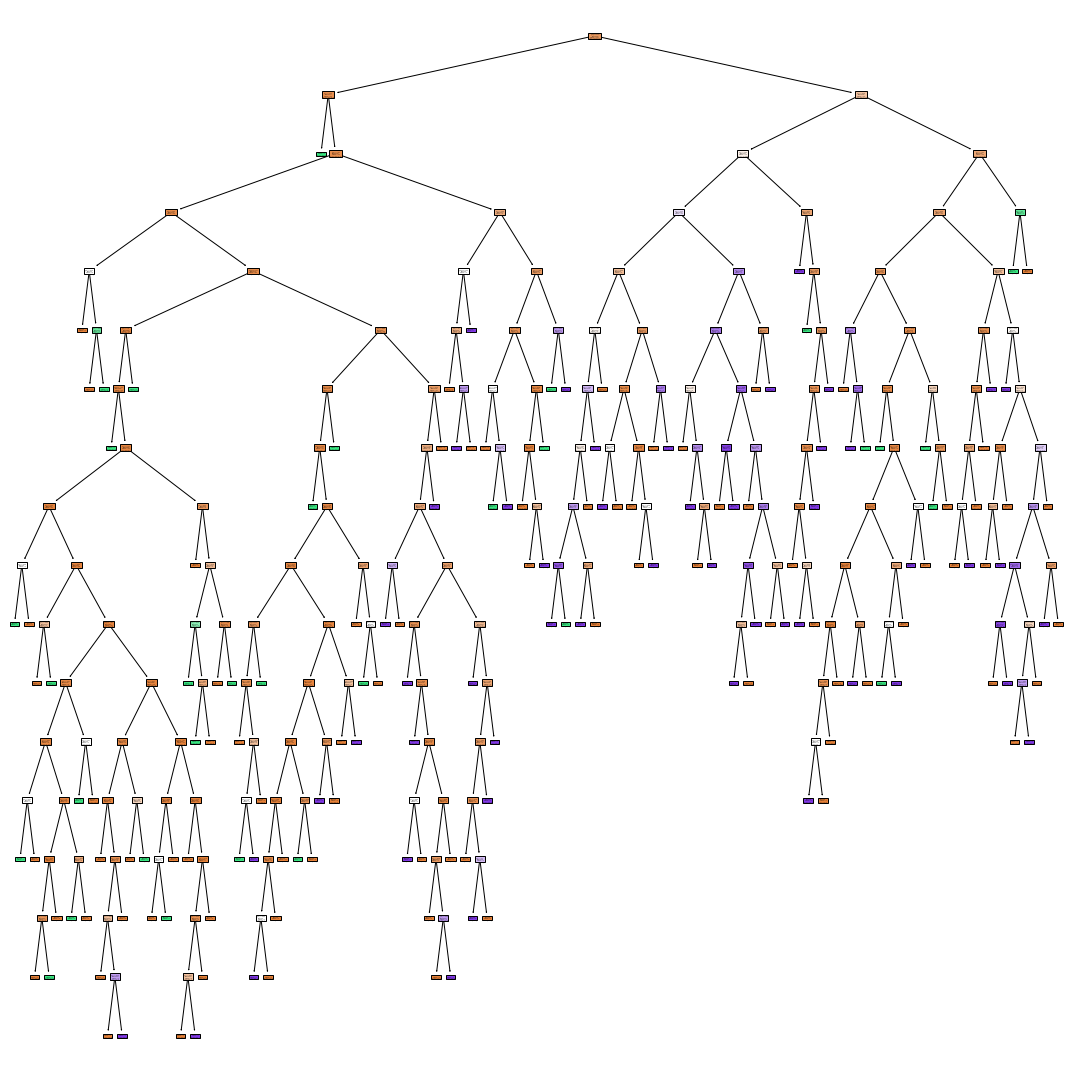

In [133]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(dtree,filled=True);
plt.tight_layout()
plt.show()

3. Random Forest Classifier

In [134]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
print("Random Forest Classifier result:- ")
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)

#confusion matrix
cm=confusion_matrix(Y_test,y_pred)
print("Confusion Matrix:- ")
print(cm)

ac=accuracy_score(Y_test,y_pred)*100
print("Accuracy:- ",ac)

cr=classification_report(Y_test,y_pred)
print("classification report ")
print(cr)

Random Forest Classifier result:- 
Confusion Matrix:- 
[[249   1   7]
 [  9   0   0]
 [ 26   0  28]]
Accuracy:-  86.5625
classification report 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       257
           1       0.00      0.00      0.00         9
           2       0.80      0.52      0.63        54

    accuracy                           0.87       320
   macro avg       0.56      0.50      0.52       320
weighted avg       0.84      0.87      0.85       320



4. Support vector classifier

In [135]:
from sklearn.svm import SVC
svc= SVC()

svc.fit(X_train, Y_train)
print("Support vector classifier results")

y_pred = svc.predict(X_test)

#confusion matrix
cm = confusion_matrix(Y_test,y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(Y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(Y_test,y_pred))

Support vector classifier results
Confusion Matrix:- 
[[253   0   4]
 [  9   0   0]
 [ 33   0  21]]
accuracy:-  85.625
Classification Report:-
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       257
           1       0.00      0.00      0.00         9
           2       0.84      0.39      0.53        54

    accuracy                           0.86       320
   macro avg       0.57      0.46      0.48       320
weighted avg       0.83      0.86      0.83       320



5. K-Nearest Neighbors classifier

In [137]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train, Y_train)

print("K-Nearest Neighbors classifier results")

y_pred = knn.predict(X_test)

#confusion matrix
cm = confusion_matrix(Y_test,y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(Y_test,y_pred)

print("accuracy:- ", accuracy*100)

print("Classification Report:-")
print(  classification_report(Y_test,y_pred))

K-Nearest Neighbors classifier results
Confusion Matrix:- 
[[243   0  14]
 [  9   0   0]
 [ 32   0  22]]
accuracy:-  82.8125
Classification Report:-
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       257
           1       0.00      0.00      0.00         9
           2       0.61      0.41      0.49        54

    accuracy                           0.83       320
   macro avg       0.49      0.45      0.46       320
weighted avg       0.79      0.83      0.80       320



In [143]:
print("Conclusion: ")

print("It is observed the key factors that determine and affects the quality of the red wine. The ordered factor 'quality' was not very helpful and to overcome this, so I created another variable called 'rating'. To make predictions I used following models'Logistic Regression','DecisionTree', 'RandomForestClassifier', 'Support Vector Classifier', 'KNearestNeighbors', 'AdaBoostClassifier','GaussianNB'. The Random Forest Classifier performed better its accuracy is 88.75% and we decided to stick with it. The usage of this analysis will help to understand whether by modifying the variables, it is possible to increase the quality of the wine on the market. If you can control your variables, then you can predict the quality of your wine and obtain more profits.")

Conclusion: 
It is observed the key factors that determine and affects the quality of the red wine. The ordered factor 'quality' was not very helpful and to overcome this, so I created another variable called 'rating'. To make predictions I used following models'Logistic Regression','DecisionTree', 'RandomForestClassifier', 'Support Vector Classifier', 'KNearestNeighbors', 'AdaBoostClassifier','GaussianNB'. The Random Forest Classifier performed better its accuracy is 88.75% and we decided to stick with it. The usage of this analysis will help to understand whether by modifying the variables, it is possible to increase the quality of the wine on the market. If you can control your variables, then you can predict the quality of your wine and obtain more profits.
